# Kaggle - Titanic Survival

https://www.kaggle.com/c/titanic

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
my_data = pd.read_csv('train.csv', delimiter=',')

## Quick look at the averages

In [4]:
my_data["Survived"].mean()

0.3838383838383838

In [5]:
my_data["Age"].mean()

29.69911764705882

In [6]:
my_data["Age"].median()

28.0

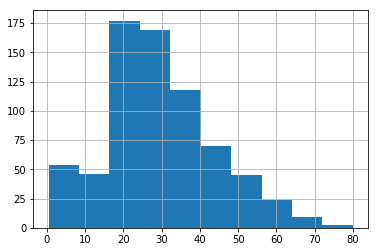

In [7]:
my_data["Age"].hist()

In [111]:
my_data[my_data.Sex=="male"]["Age"].median()

37.0

In [112]:
my_data[my_data.Sex=="female"]["Age"].median()

32.25

In [2]:
print(4+4)

8


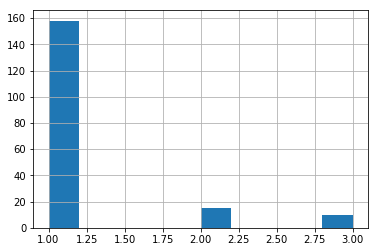

In [113]:
my_data["Pclass"].hist()

In [90]:
age_sex_grouping = my_data.groupby(['Sex',"Age"]).mean()
age_sex_grouping.head()

PassengerId  Survived  Pclass  SibSp     Parch        Fare
Sex    Age                                                             
female 2.0         252.0       0.0     2.0    0.5  1.500000   81.006250
       4.0         315.0       1.0     2.5    1.5  1.000000   27.850000
       14.0        436.0       1.0     1.0    1.0  2.000000  120.000000
       15.0        690.0       1.0     1.0    0.0  1.000000  211.337500
       16.0        563.0       1.0     1.0    0.0  0.666667   61.293067

## Survival rate by class & gender

In [8]:
class_sex_grouping = my_data.groupby(['Pclass','Sex']).mean()

## Build classifier

In [9]:
from sklearn import tree

In [10]:
my_data = my_data.dropna()

In [11]:
my_data_labels  = my_data['Survived']

In [17]:
my_data_features = my_data[["Pclass", "Age", "Sex", "Fare"]]
my_data_features.head()

,Pclass,Age,Sex,Fare
1,1,38.0,female,71.2833
3,1,35.0,female,53.1000
6,1,54.0,male,51.8625
10,3,4.0,female,16.7000
11,1,58.0,female,26.5500


In [19]:
my_data_features = my_data_features.replace("female",0).replace("male",1)
my_data_features.head()

,Pclass,Age,Sex,Fare
2,1,38.0,0,71.2833
4,1,35.0,0,53.1000
7,1,54.0,1,51.8625
11,3,4.0,0,16.7000
12,1,58.0,0,26.5500


In [68]:
clf = tree.DecisionTreeClassifier(max_depth = 4)

In [69]:
clf = clf.fit(my_data_features, my_data_labels)

In [70]:
clf.predict([[2,90,1,23]])

array([0])

In [71]:
listNames = list(my_data_features)
import graphviz
dot_data = tree.export_graphviz(clf, out_file=None,
                                feature_names=listNames,
                                filled=True, 
                                rounded=True,
                                special_characters=True)
graph = graphviz.Source(dot_data)
graph.render("titanic04") 

'titanic04.pdf'

In [72]:
rate = []

for i in range(3): # Class
    for j in range(60): # Age
        for k in range(2): # Gender

            rate.append(str(i+1) +str(" : ") + str(j) +str(" : ")+ str(k)+str(" : ")+ str( clf.predict([[i+1,j,k, 30]])))

In [73]:
rate

['1 : 0 : 0 : [0]',
 '1 : 0 : 1 : [1]',
 '1 : 1 : 0 : [0]',
 '1 : 1 : 1 : [1]',
 '1 : 2 : 0 : [0]',
 '1 : 2 : 1 : [1]',
 '1 : 3 : 0 : [0]',
 '1 : 3 : 1 : [1]',
 '1 : 4 : 0 : [1]',
 '1 : 4 : 1 : [1]',
 '1 : 5 : 0 : [1]',
 '1 : 5 : 1 : [1]',
 '1 : 6 : 0 : [1]',
 '1 : 6 : 1 : [1]',
 '1 : 7 : 0 : [1]',
 '1 : 7 : 1 : [1]',
 '1 : 8 : 0 : [1]',
 '1 : 8 : 1 : [1]',
 '1 : 9 : 0 : [1]',
 '1 : 9 : 1 : [1]',
 '1 : 10 : 0 : [1]',
 '1 : 10 : 1 : [1]',
 '1 : 11 : 0 : [1]',
 '1 : 11 : 1 : [1]',
 '1 : 12 : 0 : [1]',
 '1 : 12 : 1 : [1]',
 '1 : 13 : 0 : [1]',
 '1 : 13 : 1 : [1]',
 '1 : 14 : 0 : [1]',
 '1 : 14 : 1 : [1]',
 '1 : 15 : 0 : [1]',
 '1 : 15 : 1 : [1]',
 '1 : 16 : 0 : [1]',
 '1 : 16 : 1 : [1]',
 '1 : 17 : 0 : [1]',
 '1 : 17 : 1 : [1]',
 '1 : 18 : 0 : [1]',
 '1 : 18 : 1 : [1]',
 '1 : 19 : 0 : [1]',
 '1 : 19 : 1 : [1]',
 '1 : 20 : 0 : [1]',
 '1 : 20 : 1 : [1]',
 '1 : 21 : 0 : [1]',
 '1 : 21 : 1 : [1]',
 '1 : 22 : 0 : [1]',
 '1 : 22 : 1 : [1]',
 '1 : 23 : 0 : [1]',
 '1 : 23 : 1 : [1]',
 '1 : 24 : 0

In [74]:
test_data = pd.read_csv('test.csv', delimiter=',')

In [75]:
#test_data = test_data.replace("male",1).replace("female",0).replace("nan",25).fillna(25)
test_data = test_data.replace("male",1).replace("female",0).replace("nan",my_data["Age"].mean()).fillna(my_data["Age"].mean())

In [76]:
test_data.loc[1]

PassengerId                                 893
Pclass                                        3
Name           Wilkes, Mrs. James (Ellen Needs)
Sex                                           0
Age                                          47
SibSp                                         1
Parch                                         0
Ticket                                   363272
Fare                                          7
Cabin                                   35.6744
Embarked                                      S
Name: 1, dtype: object

In [77]:
for i in range(0,test_data.shape[0]):
    #print(test_data.loc[i].PassengerId, test_data.loc[i].Pclass, test_data.loc[i].Age, test_data.loc[i].Sex,)
    print(test_data.loc[i].PassengerId, clf.predict([[test_data.loc[i].Pclass, test_data.loc[i].Age, test_data.loc[i].Sex, test_data.loc[i].Fare]]) )

892 [0]
893 [0]
894 [0]
895 [1]
896 [1]
897 [1]
898 [0]
899 [1]
900 [0]
901 [1]
902 [1]
903 [0]
904 [1]
905 [0]
906 [1]
907 [1]
908 [1]
909 [0]
910 [0]
911 [0]
912 [0]
913 [1]
914 [1]
915 [1]
916 [1]
917 [0]
918 [1]
919 [0]
920 [1]
921 [1]
922 [0]
923 [1]
924 [1]
925 [1]
926 [1]
927 [0]
928 [0]
929 [0]
930 [1]
931 [1]
932 [1]
933 [1]
934 [0]
935 [1]
936 [1]
937 [1]
938 [0]
939 [0]
940 [1]
941 [1]
942 [1]
943 [1]
944 [1]
945 [1]
946 [1]
947 [1]
948 [1]
949 [0]
950 [1]
951 [1]
952 [1]
953 [1]
954 [0]
955 [0]
956 [1]
957 [1]
958 [0]
959 [0]
960 [1]
961 [1]
962 [0]
963 [1]
964 [0]
965 [1]
966 [1]
967 [1]
968 [1]
969 [1]
970 [1]
971 [0]
972 [1]
973 [0]
974 [0]
975 [1]
976 [1]
977 [1]
978 [0]
979 [0]
980 [0]
981 [1]
982 [1]
983 [0]
984 [1]
985 [1]
986 [1]
987 [0]
988 [1]
989 [1]
990 [0]
991 [1]
992 [1]
993 [1]
994 [0]
995 [0]
996 [0]
997 [1]
998 [0]
999 [0]
1000 [1]
1001 [1]
1002 [1]
1003 [0]
1004 [1]
1005 [0]
1006 [1]
1007 [1]
1008 [0]
1009 [0]
1010 [1]
1011 [1]
1012 [1]
1013 [0]
1014 [1]
1

In [26]:
graph